In [10]:
import matplotlib.pyplot as plt
import cv2
import os

In [11]:
img = cv2.imread("rld_img_cb/bacterial_leaf_blight/DSC_0365.JPG")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

In [12]:
# light_blue = (22, 70, 0)
# dark_blue = (128, 255, 255)
# You can use the following values for green
# light_green = (40, 40, 40)
# dark_greek = (70, 255, 255)


# light_yellow = (0, 0, 80)
# dark_yellow = (32, 255, 255)
lower_bound_blb = (0, 30, 80)
upper_bound_blb = (32, 255, 255)

mask = cv2.inRange(hsv_img, lower_bound_blb, upper_bound_blb)

In [13]:
result = cv2.bitwise_and(hsv_img, hsv_img, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)


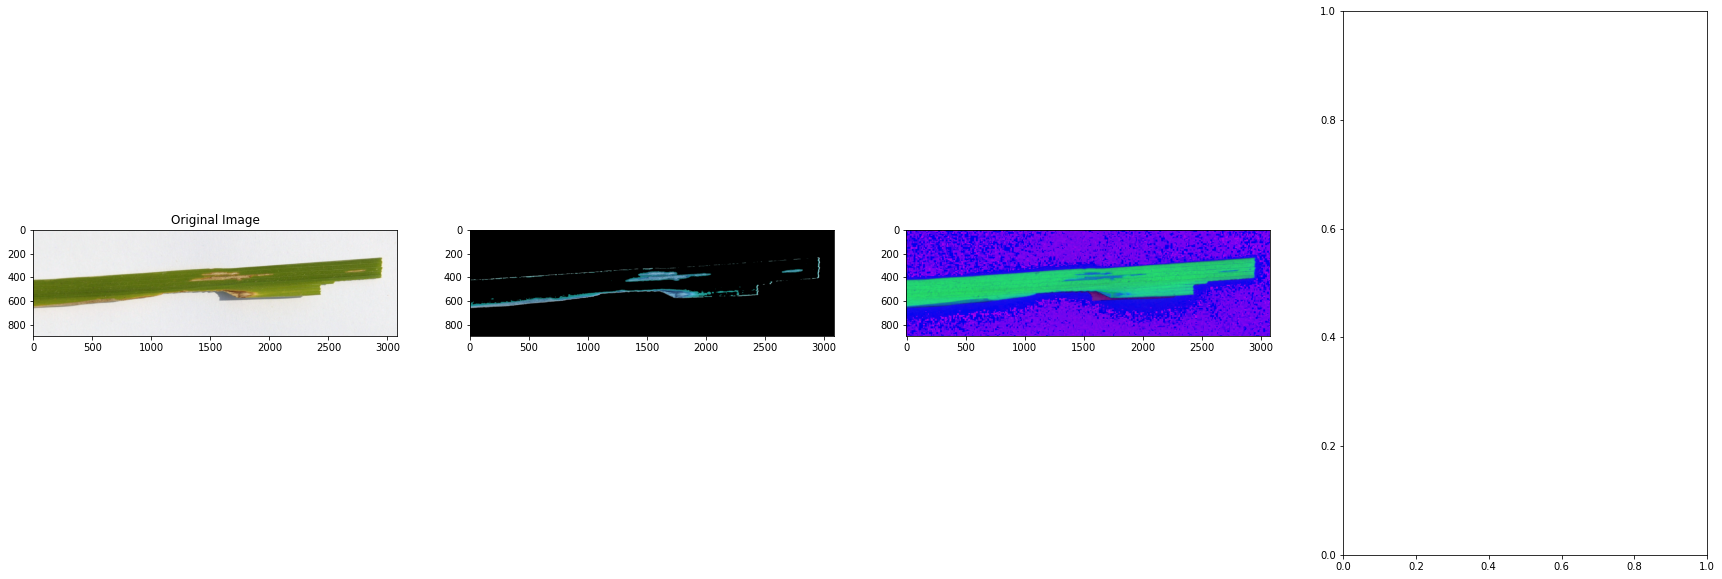

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
ax = axes.flatten()
 
# Plotting the original image
ax[0].imshow(rgb_img, cmap="gray")
ax[0].set_title("Original Image")
 
# Plotting the segmented - 100 iterations image
ax[1].imshow(result, cmap="gray")

# Plotting the final level set
ax[2].imshow(hsv_img, cmap="gray")
plt.show()

# ax[3].imshow(, cmap="gray")
# plt.show()

 

In [15]:
def segment_in_range(directory, lower_bound, upper_bound, save_path):
    """
    Segment image to only show the color between lower bound and upper bound color
    Args:
        directory: path that contains the image file
        lower_bound: lower bound for lowest accepted color. example: (0,0,0)
        upper_bound: upper bound for highest accepted color. example: (255,255,255)
        save_path: folder to save segmented image
    Returns: 
        segmented image that will be saved in the selected folder
    """
    for root, dirs, files in os.walk(directory):
        for name in files:
            file = root+"/"+name
            img = cv2.imread(file)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
            mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
            result = cv2.bitwise_and(hsv_img, hsv_img, mask=mask)
            result = cv2.cvtColor(result, cv2.COLOR_HSV2RGB)
            bgr_img = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
            cv2.imwrite(save_path + "/" + name, bgr_img)

In [16]:
# lower_bound_blb = (0, 30, 80)
# upper_bound_blb = (32, 255, 255)
# segment_in_range("rld_img_cb/bacterial_leaf_blight", lower_bound_blb, upper_bound_blb, "segment/bacterial_leaf_blight")

In [17]:
# lower_bound_blast = (0, 30, 80)
# upper_bound_blast = (32, 255, 255)

# segment_in_range("rld_img_cb/blast", lower_bound_blast, upper_bound_blast, "segment/blast")

In [18]:
# lower_bound_brown_spot = (0, 80, 0)
# upper_bound_brown_spot = (30, 255, 255)

# segment_in_range("rld_img_cb/brown_spot", lower_bound_brown_spot, upper_bound_brown_spot, "segment/brown_spot")



In [19]:
# lower_bound_healthy = (0, 100, 0)
# upper_bound_healthy = (84, 255, 255)

# segment_in_range("rld_img_cb/healthy", lower_bound_healthy, upper_bound_healthy, "segment/healthy")



In [20]:
# lower_bound_leaf_smut = (0, 30, 1)
# upper_bound_leaf_smut = (25, 255, 255)

# segment_in_range("rld_img_cb/leaf_smut", lower_bound_leaf_smut, upper_bound_leaf_smut, "segment/leaf_smut")



In [21]:
# lower_bound_tungro = (0, 100, 80)
# upper_bound_tungro = (32, 255, 255)

# segment_in_range("rld_img_cb/tungro", lower_bound_tungro, upper_bound_tungro, "segment/tungro")

